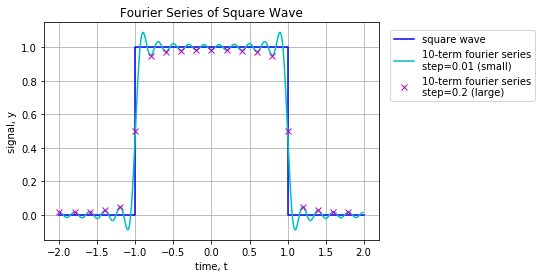

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# actual square wave
x_sq = [-2, -1, -1, 1, 1, 2]
y_sq = [0, 0, 1, 1, 0, 0]
def fourier_sq(x, n):
    '''fourier series approx to square wave with n terms'''
    # first term
    y = 0.5*np.ones_like(x)
    sign = -1
    # other terms m = 1, 3, 5, 7
    for m in range(1, 2*n, 2):
        # alternate +ve and -ve sign
        sign = -sign
        y += sign*2/m/np.pi * np.cos (m*np.pi*x / 2)
    return y
xSM = np.arange(-2, 2, 0.01)
xL = np.arange(-2, 2, 0.2)
ySM = fourier_sq(xSM, 10)
yL = fourier_sq(xL, 10)
fig = plt.figure()
plt.plot(x_sq, y_sq, 'b', label='square wave')
plt.plot(xSM, ySM, 'c', label='10-term fourier series\nstep=0.01 (small)')
plt.plot(xL, yL, 'xm', label='10-term fourier series\nstep=0.2 (large)')
plt.xlabel('time, t'), plt.ylabel('signal, y')
plt.title('Fourier Series of Square Wave')
plt.legend(loc='center', bbox_to_anchor=[1,.8,.5,0])
plt.grid()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

# laplace equation
# ∂U/∂t = 𝛼²∇²U
# on a circular disk with 
# R=1, 𝛼=1
# domain -1.5 to 1.5 in x and y
points = np.linspace(-1.5, 1.5, 300)
y, x = np.meshgrid(points, points)
dx, dy = (points[1] - points[0], points[1] - points[0])
def outsidecircle(xarr, yarr):
    '''Operates on x,y coordinate arrays. Returns boolean array whose elements are True if x,y lie outside unit circle'''
    return xarr**2 + yarr**2 > 1
def lefttest(xarr, yarr):
    '''Boolean array whose elements are True if x,y on left boundary of unit circle'''
    return np.logical_and(xarr < 0, outsidecircle(xarr, yarr))
def righttest(xarr, yarr):
    '''Boolean array whose elements are True if x,y on right boundary of unit circle'''
    return np.logical_and(xarr >= 0, outsidecircle(xarr, yarr))
def bottomtest(xarr, yarr):
    '''Boolean array whose elements are True if x,y on bottom boundary of unit circle'''
    return np.logical_and(yarr < 0, outsidecircle(xarr, yarr))
def toptest(xarr, yarr):
    '''Boolean array whose elements are True if x,y on top boundary of unit circle'''
    return np.logical_and(yarr >= 0, outsidecircle(xarr, yarr))
def laplacian(field, deltax, deltay):
    '''approximate laplacian of 2D field using finite difference.
    deltax, deltay can be constant scalar or list of coordinates'''
    dudx, dudy = np.gradient(field, deltax, deltay)
    d2udx, null = np.gradient(dudx, deltax, deltay)
    null, d2udy = np.gradient(dudy, deltax, deltay)
    return d2udx + d2udy
def laplacian_NNNN(field, deltax, deltay):
    ''' ***NOT USED***
    approximate laplacian of 2D field using finite difference.
    deltax, deltay specify constant spacing of points'''
    # there is not any checking of the input array size
    # forward and backward difference for edge boundaries
    x0, x1, x2 = field[0,:], field[1,:], field[2,:]
    xb0, xb1, xb2 = field[-1,:], field[-2,:], field[-3,:]
    y0, y1, y2 = field[:,0], field[:,1], field[:,2]
    yb0, yb1, yb2 = field[:,-1], field[:,-2], field[:,-3]
    # central difference for middle portions
    x_A, x_B, x_C = field[0:-2,:], field[1:-1,:], field[2:,:]
    y_A, y_B, y_C = field[:,0:-2], field[:,1:-1], field[:,2:]
    # setup derivative arrays
    d2udx, d2udy = (np.zeros_like(field), np.zeros_like(field))
    # coefficients for 2nd derivative are 1, -2, 1 whether central, forward, or backward difference
    # x-direction
    d2udx[0,:] = (1*x0 - 2*x1 + 1*x2) / deltax**2
    d2udx[-1,:] = (1*xb0 - 2*xb1 + 1*xb2) / deltax**2
    d2udx[1:-1, :] = (1*x_A - 2*x_B + 1*x_C) / deltax**2
    # y-direction
    d2udy[:,0] = (1*y0 - 2*y1 + 1*y2) / deltay**2
    d2udy[:,-1] = (1*yb0 - 2*yb1 + 1*yb2) / deltay**2
    d2udy[:, 1:-1] = (1*y_A - 2*y_B + 1*y_C) / deltay**2
    return d2udx + d2udy
class heat_plot:
    '''helper for plotting'''
    def __init__(self, x, y, u, tmin, tmax):
        '''plot initial condition'''
        self.x = x
        self.y = y
        # colorbar scale limits
        self.tmin = tmin
        self.tmax = tmax
        fig = plt.figure(figsize=(7,6.4))
        # adjust size to fit long title
        fig.subplots_adjust(top=.82)
        plt.pcolormesh(x, y, u, cmap='rainbow', vmin=self.tmin, vmax=self.tmax)
        cbar = plt.colorbar(fraction=.08, shrink=.8)
        cbar.set_label('Temperature')
    def update(self, u, title):
        '''plot results'''
        plt.cla()
        plt.pcolormesh(self.x, self.y, u, cmap='rainbow', vmin=self.tmin, vmax=self.tmax)
        plt.title(title)
        plt.xlabel('x-coord')
        plt.ylabel('y-coord')
        plt.pause(0.05)
# setup initial conditions
# left boundary u=1, right boundary u=2
uleft = 1
uright = 2
u = np.ones_like(x) * 1.5
left = lefttest(x, y)
right = righttest(x, y)
u[left] = uleft
u[right] = uright
# tlow, thigh for colorbar scale limits
tlow, thigh = 0.8, 2.2
heatplot = heat_plot(x, y, u, tlow, thigh)
plt.show()
# iterate time steps
dt = 0.00005
niter = 801
plotinterval = 200
for i in range(niter+1):
    if i % plotinterval == 0:
        heatplot.update(u
,title = 
'''Heat Transfer for 2D Disk
Left-boundary u=1, Right-boundary u=2
Time, t = %.3f secs
Iteration Steps = %.0f'''
% (i*dt, i)
        ) # end update
    # end if
    ddt = laplacian(u, dx, dy)
    u = u + ddt*dt
    u[left] = uleft
    u[right] = uright
# end for
# plt.close()

# next scenario
# top half u=-1, bottom half u=1
utop = -1
ubottom = 1
u = np.ones_like(x) * 0
top = toptest(x, y)
bottom = bottomtest(x, y)
u[top] = utop
u[bottom] = ubottom
# tlow, thigh for colorbar scale limits
tlow, thigh = -1.2, 1.2
heatplot = heat_plot(x, y, u, tlow, thigh)
plt.show()
# iterate time steps
dt = 0.00005
niter = 801
plotinterval = 200
for i in range(niter+1):
    if i % plotinterval == 0:
        heatplot.update(u
,title = 
'''Heat Transfer for 2D Disk
Top-boundary u=-1, Bottom-boundary u=1
Time, t = %.3f secs
Iteration Steps = %.0f'''
% (i*dt, i)
        ) # end update
    # end if
    ddt = laplacian(u, dx, dy)
    u = u + ddt*dt
    u[top] = utop
    u[bottom] = ubottom
# end for
# plt.close()

# next scenario
# boundary fixed at u(𝜃)=cos(𝜃)
def cos_theta(x, y):
    '''u(𝜃)=cos(𝜃). Convert x, y to angle then compute cosine'''
    angle = np.angle(x + 1j*y)
    return np.cos(angle)
u = np.ones_like(x) * 0
outer = outsidecircle(x, y)
u[outer] = cos_theta(x[outer], y[outer])
# tlow, thigh for colorbar scale limits
tlow, thigh = -1.2, 1.2
heatplot = heat_plot(x, y, u, tlow, thigh)
plt.show()
# iterate time steps
dt = 0.00005
niter = 801
plotinterval = 200
for i in range(niter+1):
    if i % plotinterval == 0:
        heatplot.update(u
,title = 
'''Heat Transfer for 2D Disk
Boundary u(a)=cos(a)
Time, t = %.3f secs
Iteration Steps = %.0f'''
% (i*dt, i)
        ) # end update
    # end if
    ddt = laplacian(u, dx, dy)
    u = u + ddt*dt
    u[outer] = cos_theta(x[outer], y[outer])
# end for


In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# potential flow equation
# 𝜙(z) = U0(z) + k/z
# potential is Real(𝜙)
# stream is Imag(𝜙)


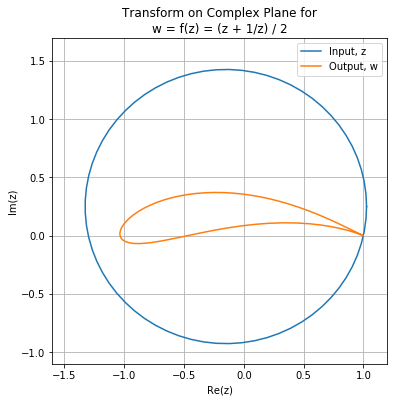

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Joukowsky, w=f(z)=1/2(z + 1/z)
# z is circular represented in the complex plane in polar notation
# z = R*exp(i𝜃)
# map circle centered at [-0.15, 0.25] and passing through the point z = 1
pi = np.pi
centre = -0.15 + 0.25j
point = 1 + 0j
# absolute function of complex number is equivalent to distance
R = np.abs(point - centre)
theta = np.linspace(0, 2*pi, 70)
# translate(move) circle to centrepoint
z = centre + R * np.exp(1j * theta)
def cartesian(Ncomplex):
    '''split complex number into real and imaginary parts'''
    return np.real(Ncomplex), np.imag(Ncomplex)
x1, y1 = cartesian(z)
# compute joukowsky
w = (z + 1/z) / 2
x2, y2 = cartesian(w)
# need square figsize so circles look like circles
fig = plt.figure(figsize=(6, 6))
plt.plot(x1, y1, label='Input, z')
plt.plot(x2, y2, label='Output, w')
plt.title(
'''Transform on Complex Plane for
w = f(z) = (z + 1/z) / 2''')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.axis((-1.6, 1.2, -1.1, 1.7))
plt.legend(), plt.grid()
plt.show()

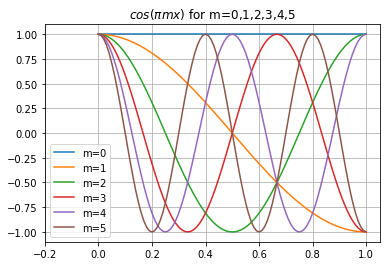

Evaluate Inner Product <cos(𝜋mx),cos(𝜋nx)> for various pairs m and n:
m=1, n=4 --> 0.0000000000000000503069808
m=2, n=6 --> -0.0000000000000000034694470
m=3, n=15 --> -0.0000000000000001318389842


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline
# plot cos(𝜋mx) for m=0,1,2,3,4,5
pi = np.pi
dx = 0.01
x = np.arange(0, 1+dx, dx)
plt.figure()
for m in range(6):
    plt.plot(x, np.cos(pi * m * x), label='m={}'.format(m))
plt.title('$cos(\pi mx)$ for m=0,1,2,3,4,5')
plt.grid()
plt.xlim(-.2, 1.05)
plt.legend()
plt.show()
# verify pairs <cos(𝜋mx),cos(𝜋nx)> are orthogonal
pairs = [[1, 4],
         [2, 6],
         [3, 15]]
print('Evaluate Inner Product <cos(𝜋mx),cos(𝜋nx)> for various pairs m and n:')
for pair in pairs:
    m, n = pair
    prod = np.cos(pi*m*x) * np.cos(pi*n*x)
    ip = integrate.trapz(prod, x)
    print('m={}, n={} --> {:.25f}'.format(m, n, ip))

In [109]:
import numpy as np
# function space f(x) and g(x) with inner product <f,g>
# verify 3 axioms
# <f,g> = <g,f>
# <af,g> = a<f,g>
# <f,f> >= 0 and only 0 at f=0

# grid spacing
dx = 0.0001
a = 6.384
# define functions f(x) and g(x)
def f(x): return -x**3
def g(x): return 3.4**x
points = np.arange(0, 1, dx)
# approximate integration
def integral(values): return values.sum() * dx
# check <f,g> = <g,f>
innerproduct1 = integral(f(points) * g(points))
innerproduct2 = integral(g(points) * f(points))
print(innerproduct1)
print(innerproduct2)
# check <af,g> = a<f,g>
innerproduct1 = integral(a * f(points) * g(points))
innerproduct2 = a * integral(f(points) * g(points))
print(innerproduct1)
print(innerproduct2)
# check <f,f> >= 0
innerproduct1 = integral(f(points) * f(points))
print("<f,f> = {} --> is greater than 0".format(innerproduct1))

-0.6778000940900576
-0.6778000940900576
-4.3270758006709285
-4.327075800670928
<f,f> = 0.14280714785714288 --> is greater than 0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
pi = np.pi
x0, y0 = np.mgrid[-5.01:5:.2, -5.01:5:.2]
z0 = x0 + y0 * 1j
f0 = np.log(z0)
fig, axs = plt.subplots(1, 2, subplot_kw={'projection':'3d'}, figsize=(12, 6))
# plot real part with pole
axs[0].plot_surface(x0, y0, np.real(f0), cmap='jet')
axs[0].set_title('Real part of Log(Z)')
axs[0].set_xlabel('Re(Z)')
axs[0].set_ylabel('Im(Z)')
axs[0].set_zlabel('Re Log(Z)')
# generate imaginary part explicitly as spiral
# done in quadrants .5 + 1 + 1 + 1 + .5
r1, theta1 = np.mgrid[.01:1:.04, -pi:-pi*3/4:.02]
r2, theta2 = np.mgrid[.01:1:.04, -pi*3/4:-pi*1/4:.02]
r3, theta3 = np.mgrid[.01:1:.04, -pi*1/4:pi*1/4:.02]
r4, theta4 = np.mgrid[.01:1:.04, pi*1/4:pi*3/4:.02]
r5, theta5 = np.mgrid[.01:1:.04, pi*3/4:pi:.02]
x1, y1 = -r1, -r1 * np.tan(theta1)
x2, y2 = r2 * np.tan(theta3), -r2
x3, y3 = r3, r3 * np.tan(theta3)
x4, y4 = -r4 * np.tan(theta3), r4
x5, y5 = -r5, -r5 * np.tan(theta5)
x_all = np.concatenate((x1, x2, x3, x4, x5), axis=1)
y_all = np.concatenate((y1, y2, y3, y4, y5), axis=1)
theta_all = np.concatenate((theta1, theta2, theta3, theta4, theta5), axis=1)
for angle in np.arange(0, 6 * pi, 2 * pi):
    axs[1].plot_surface(x_all, y_all, theta_all + angle, cmap='jet')
axs[1].set_title('Imaginary part of Log(Z)')
axs[1].set_xlabel('Re(Z)')
axs[1].set_ylabel('Im(Z)')
axs[1].set_zlabel('Im Log(Z)')
plt.show()

In [107]:
import numpy as np
pi = np.pi
n = 10000
dtheta = 2 * pi / n
integral = 0
for theta in np.arange(0, 2 * pi, dtheta):
    z = np.exp(1j * theta)
    dz = 1j * z * dtheta
    f = np.cos(z) / z
    integral += dz * f
integral

(-1.1194583307281886e-16+6.283185307179591j)

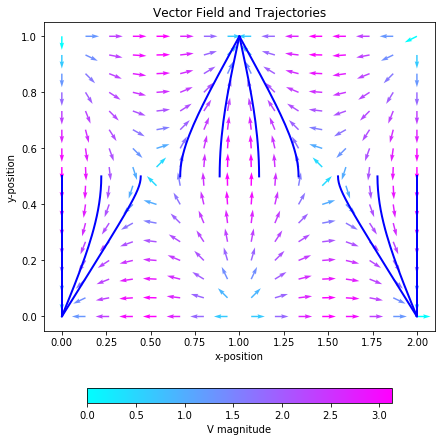

In [106]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
# field equations
# v1 = 𝜋 sin 𝜋x cos 𝜋y
# v2 = -𝜋 cos 𝜋x sin 𝜋y
def vfunc(x, y):
    pi = np.pi
    v1 = -pi * np.sin(pi * x) * np.cos(pi * y)
    v2 = -pi * np.cos(pi * x) * np.sin(pi * y)
    return np.array((v1, v2))
# setup grid
xygrid = np.mgrid[0:2:16j, 0:1:16j]
x, y = xygrid
vgrid = vfunc(x, y)
v1, v2 = vgrid
# magnitude for color scale
vmag = np.sqrt(v1 ** 2 + v2 ** 2)
fig, axs = plt.subplots(figsize=(7,7))
# avoids divide by zero error
magdivisor = np.where(vmag>0, vmag, 1)
# plot field of arrows
plt.quiver(x, y, v1 / magdivisor, v2 / magdivisor, vmag, cmap='cool')
cbar = plt.colorbar(orientation='horizontal', fraction=.04)
cbar.set_label('V magnitude')
plt.title('Vector Field and Trajectories')
plt.xlabel('x-position'), plt.ylabel('y-position')
# trajectory for x=0 to 2, y=0.5
# for time t=0 to 10
xyinit = np.mgrid[0:2:10j, .5:1:1j]
length = xyinit[0].size
xslice = slice(0, length)
yslice = slice(length, None)
tend = 10
t = np.arange(0, tend, .01)
# vector unravelled for integrator
sol = solve_ivp(
    lambda t, arr: vfunc(arr[xslice], arr[yslice]).ravel(),
    t_span = (0, tend),
    y0 = xyinit.ravel(),
    t_eval = t,
    atol = 1e-9,
    rtol = 1e-9
)
# reshape to columns of paths
nt = sol.y.shape[1]
xsolution = sol.y[xslice,:].transpose()
ysolution = sol.y[yslice,:].transpose()
# color cycle
# axs[0].set_prop_cycle(color=mp.cm.ScalarMappable(cmap='jet').to_rgba(range(10)))
# plot trajectories
plt.plot(xsolution, ysolution, linewidth=2, color='blue')
# plt.grid()
plt.title('Vector Field and Trajectories')
plt.xlabel('x-position'), plt.ylabel('y-position')
# plt.xlim(0, 2)
# plt.ylim(0, 1)
plt.show()
